In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nidaqmx as daq
from nidaqmx import stream_readers, constants, DaqError
import time


In [2]:
mychans = ""
ch_list = []
dev = "PXI1Slot6"
for i in range(6):
    ch_list.append("ai{}".format(i))

for i, chan in enumerate(ch_list):
    if i < len(ch_list) - 1:
        mychans += dev + "/" + chan + ", "
    else:
        mychans += dev + "/" + chan

print "mychans : " + mychans

mychans : PXI1Slot6/ai0, PXI1Slot6/ai1, PXI1Slot6/ai2, PXI1Slot6/ai3, PXI1Slot6/ai4, PXI1Slot6/ai5


In [40]:
Tconfig = constants.TerminalConfiguration["RSE"]
task = daq.Task()

task.ai_channels.add_ai_voltage_chan(mychans,terminal_config=Tconfig)
task.timing.cfg_samp_clk_timing(1000,sample_mode=daq.constants.AcquisitionType.CONTINUOUS)
task.triggers.start_trigger.cfg_dig_edge_start_trig("PFI0")
#print task.triggers.start_trigger.retriggerable
task.start()

#Make Stream reader
Task_in_Stream = daq._task_modules.in_stream.InStream(task)
reader = stream_readers.AnalogMultiChannelReader(Task_in_Stream)
for i in range(1000):
    dat = np.zeros(6)
    reader.read_one_sample(dat)
    print dat, i
    
task.close()

[0.39642334 0.42572021 0.70419312 0.65994263 0.52047729 0.17944336] 0
[0.39611816 0.4258728  0.7043457  0.6602478  0.52062988 0.17974854] 1
[0.39627075 0.42572021 0.7043457  0.66009521 0.52047729 0.17990112] 2
[0.39611816 0.42572021 0.70419312 0.66009521 0.52047729 0.17974854] 3
[0.39627075 0.42602539 0.70449829 0.66040039 0.52093506 0.17990112] 4
[0.39627075 0.4258728  0.7043457  0.66070557 0.52108765 0.1802063 ] 5
[0.39642334 0.42633057 0.70495605 0.66055298 0.52062988 0.17990112] 6
[0.39611816 0.42617798 0.70480347 0.66055298 0.52078247 0.1802063 ] 7
[0.39672852 0.42602539 0.70480347 0.66040039 0.52062988 0.17974854] 8
[0.39672852 0.42617798 0.70480347 0.66055298 0.52062988 0.17990112] 9
[0.39581299 0.4258728  0.70465088 0.66040039 0.52062988 0.17974854] 10
[0.39596558 0.42617798 0.70449829 0.65994263 0.52078247 0.17974854] 11
[0.39596558 0.42526245 0.70404053 0.66055298 0.52047729 0.17929077] 12
[0.39596558 0.42572021 0.7043457  0.66055298 0.52078247 0.17974854] 13
[0.39596558 0.42

[0.39581299 0.42541504 0.70327759 0.65979004 0.52001953 0.17959595] 165
[0.39581299 0.42572021 0.70449829 0.65994263 0.52047729 0.17974854] 166
[0.39581299 0.42556763 0.70388794 0.65994263 0.52017212 0.17990112] 167
[0.39627075 0.4258728  0.70419312 0.66040039 0.52078247 0.17990112] 168
[0.39627075 0.42541504 0.7043457  0.66040039 0.52062988 0.17974854] 169
[0.39596558 0.42556763 0.70404053 0.66055298 0.52078247 0.18005371] 170
[0.39642334 0.42572021 0.70465088 0.66055298 0.52078247 0.17990112] 171
[0.39596558 0.42541504 0.70373535 0.66009521 0.52047729 0.17990112] 172
[0.39642334 0.4258728  0.70388794 0.66040039 0.52078247 0.17974854] 173
[0.39581299 0.42541504 0.70388794 0.66009521 0.52032471 0.18005371] 174
[0.39627075 0.4258728  0.7043457  0.65994263 0.52062988 0.17990112] 175
[0.39611816 0.42541504 0.7043457  0.65994263 0.52047729 0.17944336] 176
[0.3956604  0.42556763 0.70419312 0.66009521 0.52017212 0.17959595] 177
[0.3956604  0.42526245 0.70388794 0.65933228 0.52017212 0.179748

[0.39520264 0.42510986 0.70358276 0.65933228 0.51986694 0.17929077] 327
[0.39535522 0.42541504 0.70358276 0.65933228 0.52032471 0.17990112] 328
[0.39489746 0.42480469 0.70373535 0.65917969 0.51986694 0.17929077] 329
[0.39581299 0.42449951 0.70358276 0.65933228 0.52032471 0.17990112] 330
[0.39520264 0.42495728 0.70358276 0.65963745 0.51986694 0.17959595] 331
[0.39550781 0.42510986 0.70358276 0.65917969 0.52001953 0.17944336] 332
[0.39535522 0.42526245 0.70373535 0.65994263 0.52017212 0.17974854] 333
[0.39581299 0.42510986 0.70358276 0.65979004 0.52017212 0.17959595] 334
[0.3956604  0.42526245 0.70343018 0.65933228 0.52017212 0.18005371] 335
[0.39550781 0.42541504 0.70358276 0.65963745 0.52017212 0.17990112] 336
[0.39596558 0.42572021 0.70404053 0.65979004 0.52047729 0.18005371] 337
[0.3956604  0.42572021 0.70343018 0.65933228 0.52001953 0.17959595] 338
[0.39627075 0.42541504 0.70388794 0.66009521 0.52062988 0.17974854] 339
[0.39535522 0.42495728 0.703125   0.65948486 0.51986694 0.179748

[0.39550781 0.42541504 0.70343018 0.65948486 0.52017212 0.17944336] 494
[0.3956604  0.42541504 0.70373535 0.65948486 0.52047729 0.1802063 ] 495
[0.39581299 0.42495728 0.70343018 0.65979004 0.52047729 0.17959595] 496
[0.3956604  0.42541504 0.7043457  0.65994263 0.52093506 0.18005371] 497
[0.39535522 0.42556763 0.70373535 0.65933228 0.52047729 0.17974854] 498
[0.39627075 0.42572021 0.7043457  0.65994263 0.52093506 0.17990112] 499
[0.39581299 0.42510986 0.70373535 0.65979004 0.52032471 0.17944336] 500
[0.39627075 0.42602539 0.70404053 0.66009521 0.52078247 0.18005371] 501
[0.39611816 0.42556763 0.70373535 0.65963745 0.52047729 0.17974854] 502
[0.39611816 0.42572021 0.70404053 0.66009521 0.52047729 0.18005371] 503
[0.39596558 0.42526245 0.70343018 0.6602478  0.52047729 0.17974854] 504
[0.39627075 0.42541504 0.70449829 0.65994263 0.52032471 0.17974854] 505
[0.39581299 0.42541504 0.70404053 0.65979004 0.52032471 0.17990112] 506
[0.39581299 0.42572021 0.70358276 0.65994263 0.52017212 0.179901

[0.39642334 0.42602539 0.70495605 0.66040039 0.52108765 0.17990112] 663
[0.39611816 0.4258728  0.70465088 0.6602478  0.52078247 0.17974854] 664
[0.39672852 0.42602539 0.7043457  0.66070557 0.52078247 0.17974854] 665
[0.39611816 0.42572021 0.70419312 0.6602478  0.52093506 0.17959595] 666
[0.39642334 0.42648315 0.70465088 0.66055298 0.52108765 0.17990112] 667
[0.39657593 0.42617798 0.70480347 0.66009521 0.52139282 0.18035889] 668
[0.39642334 0.42633057 0.70480347 0.66116333 0.52108765 0.17990112] 669
[0.39718628 0.42724609 0.70541382 0.66162109 0.52139282 0.18066406] 670
[0.39703369 0.42663574 0.70465088 0.66040039 0.52139282 0.18005371] 671
[0.39718628 0.42709351 0.70526123 0.66131592 0.521698   0.18051147] 672
[0.39627075 0.42617798 0.70495605 0.66040039 0.52124023 0.17990112] 673
[0.3968811  0.42678833 0.70510864 0.66101074 0.52139282 0.18035889] 674
[0.39657593 0.42572021 0.70510864 0.66070557 0.52124023 0.17990112] 675
[0.39657593 0.42633057 0.70495605 0.66055298 0.52108765 0.180053

[0.39581299 0.42602539 0.7043457  0.66040039 0.52062988 0.17990112] 827
[0.39642334 0.42572021 0.70449829 0.66055298 0.52062988 0.1802063 ] 828
[0.39596558 0.4258728  0.7043457  0.66040039 0.52078247 0.17974854] 829
[0.39627075 0.42617798 0.70449829 0.66040039 0.52108765 0.18005371] 830
[0.39611816 0.42556763 0.70465088 0.66009521 0.52062988 0.17990112] 831
[0.3956604  0.42556763 0.70419312 0.6602478  0.52093506 0.17990112] 832
[0.3956604  0.42526245 0.70358276 0.6602478  0.52078247 0.17974854] 833
[0.39611816 0.42556763 0.70495605 0.66070557 0.52139282 0.18035889] 834
[0.39550781 0.42572021 0.7043457  0.66055298 0.52078247 0.18005371] 835
[0.39657593 0.4258728  0.70465088 0.66055298 0.52124023 0.18035889] 836
[0.39581299 0.42541504 0.70449829 0.66040039 0.52062988 0.17990112] 837
[0.39672852 0.42633057 0.70465088 0.6602478  0.52108765 0.18005371] 838
[0.39627075 0.4258728  0.70419312 0.66040039 0.52093506 0.18005371] 839
[0.39657593 0.42602539 0.7043457  0.66040039 0.52124023 0.180053

[0.39596558 0.42556763 0.70419312 0.66040039 0.52093506 0.18005371] 995
[0.39657593 0.4258728  0.70449829 0.66040039 0.52124023 0.18005371] 996
[0.39596558 0.42556763 0.7043457  0.66009521 0.52062988 0.17990112] 997
[0.39596558 0.42556763 0.70526123 0.66055298 0.52078247 0.17990112] 998
[0.39581299 0.42572021 0.70480347 0.66055298 0.52078247 0.17990112] 999


In [5]:
Tconfig = constants.TerminalConfiguration["RSE"]
task = daq.Task()

task.ai_channels.add_ai_voltage_chan(mychans,terminal_config=Tconfig)
task.timing.cfg_samp_clk_timing(1000,sample_mode=daq.constants.AcquisitionType.CONTINUOUS)
task.triggers.start_trigger.cfg_dig_edge_start_trig("PFI0")
#print task.triggers.start_trigger.retriggerable
task.start()

#Make Stream reader
Task_in_Stream = daq._task_modules.in_stream.InStream(task)
reader = stream_readers.AnalogMultiChannelReader(Task_in_Stream)
for i in range(2):
    dat = np.zeros(6)
    try:
        reader.read_one_sample(dat,timeout=2)
    except DaqError as d_err:
        print d_err.error_code
        if d_err.error_code == -200284:
            print "Timeout!"
        #raise d_err
    print dat, i

-200284
Timeout!
[0. 0. 0. 0. 0. 0.] 0
-200284
Timeout!
[0. 0. 0. 0. 0. 0.] 1


In [9]:
task.stop()
task.triggers.start_trigger.disable_start_trig()
print task.read()
task.stop()
task.triggers.start_trigger.cfg_dig_edge_start_trig("PFI0")
try:
    reader.read_one_sample(dat,timeout=2)
    print dat
except DaqError as d_err:
    print d_err.error_code
    if d_err.error_code == -200284:
        print "Timeout!"
print dat

[0.38604736328125, 0.424652099609375, 0.705108642578125, 0.661773681640625, 0.528717041015625, 0.178070068359375]
-200284
Timeout!
[0. 0. 0. 0. 0. 0.]


In [4]:
task.close()

In [15]:
task.name

DaqError: Task specified is invalid or does not exist.
Status Code: -200088

In [2]:
task_name = "PD0"

i = 1
while True:
    try:
        task = daq.Task(task_name)
        break
    except DaqError as e_Daq:
        print e_Daq
        task_name = task_name[:-1] + repr(i)
        i+=1
        
print task.name
Tconfig = daq.constants.TerminalConfiguration["RSE"]
task.ai_channels.add_ai_voltage_chan("PXI1Slot6/ai0:5",terminal_config=Tconfig)
dat = np.array(task.read( int(1e5) )).T
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(dat)
ax[1].plot(task.channel_names,dat.std(0),'+')
ax[0].legend(task.channel_names)
ax[0].set_title("Channel Voltages with MOT beams on")
ax[0].set_ylabel("V")
ax[1].set_title("Voltage fluctuations by channel")
ax[1].set_ylabel("std (V)")
fig.show()
task.close()

NameError: name 'DaqError' is not defined

Task name specified conflicts with an existing task name.
Task Name: PD0

Status Code: -200089
Task name specified conflicts with an existing task name.
Task Name: PD1

Status Code: -200089
Task name specified conflicts with an existing task name.
Task Name: PD2

Status Code: -200089
Task name specified conflicts with an existing task name.
Task Name: PD3

Status Code: -200089
Task name specified conflicts with an existing task name.
Task Name: PD4

Status Code: -200089
Task name specified conflicts with an existing task name.
Task Name: PD5

Status Code: -200089


Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in 

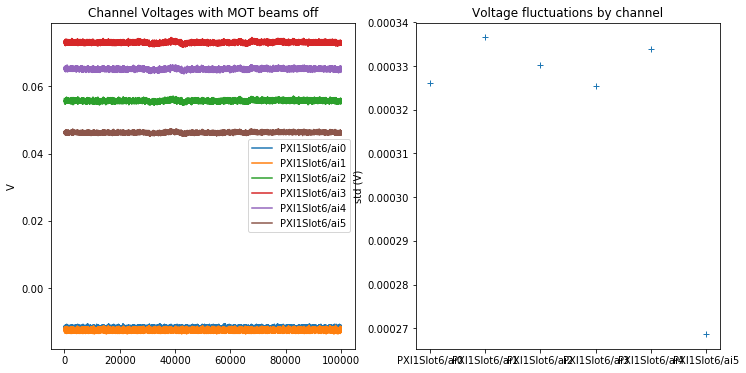

In [48]:
task_name = "PD0"

i = 1
while True:
    try:
        task = daq.Task(task_name)
        break
    except DaqError as e_Daq:
        print e_Daq
        task_name = task_name[:-1] + repr(i)
        i+=1
        
# print task.name
Tconfig = daq.constants.TerminalConfiguration["RSE"]
task.ai_channels.add_ai_voltage_chan("PXI1Slot6/ai0:5",terminal_config=Tconfig)
dat = np.array(task.read( int(1e5) )).T
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(dat)
ax[1].plot(task.channel_names,dat.std(0),'+')
ax[0].legend(task.channel_names)
ax[0].set_title("Channel Voltages with MOT beams off")
ax[0].set_ylabel("V")
ax[1].set_title("Voltage fluctuations by channel")
ax[1].set_ylabel("std (V)")
fig.show()
task.close()

Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in Exception nidaqmx.errors.DaqError: DaqError(u'Task specified is invalid or does not exist.\nStatus Code: -200088',) in 

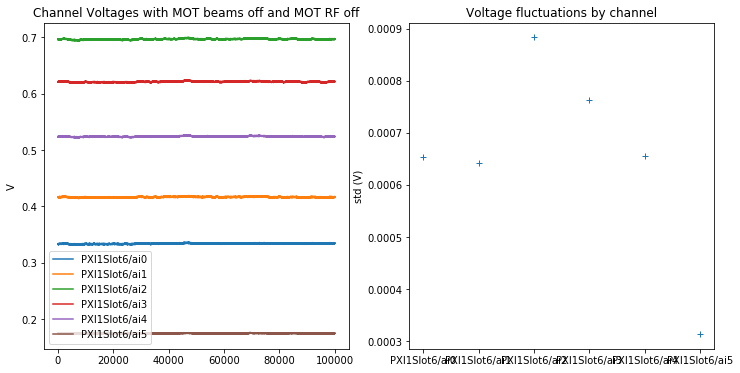

In [51]:
task_name = "PD0"

i = 1
while True:
    try:
        task = daq.Task(task_name)
        break
    except DaqError as e_Daq:
        #print e_Daq
        task_name = task_name[:-1] + repr(i)
        i+=1
        
# print task.name
Tconfig = daq.constants.TerminalConfiguration["RSE"]
task.ai_channels.add_ai_voltage_chan("PXI1Slot6/ai0:5",terminal_config=Tconfig)
dat = np.array(task.read( int(1e5) )).T
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(dat)
ax[1].plot(task.channel_names,dat.std(0),'+')
ax[0].legend(task.channel_names)
ax[0].set_title("Channel Voltages with MOT beams off and MOT RF off")
ax[0].set_ylabel("V")
ax[1].set_title("Voltage fluctuations by channel")
ax[1].set_ylabel("std (V)")
fig.show()
task.close()

In [8]:
task.close()

In [70]:
import nidaqmx.system
import collections

In [85]:
system = nidaqmx.system.System.local()
device = system.devices["PXI1Slot6"]
tf = device.

[u'/PXI1Slot6/PFI0', u'/PXI1Slot6/PFI1', u'/PXI1Slot6/PFI2', u'/PXI1Slot6/PFI3', u'/PXI1Slot6/PFI4', u'/PXI1Slot6/PFI5', u'/PXI1Slot6/PFI6', u'/PXI1Slot6/PFI7', u'/PXI1Slot6/PFI8', u'/PXI1Slot6/PFI9', u'/PXI1Slot6/PXI_Trig0', u'/PXI1Slot6/PXI_Trig1', u'/PXI1Slot6/PXI_Trig2', u'/PXI1Slot6/PXI_Trig3', u'/PXI1Slot6/PXI_Trig4', u'/PXI1Slot6/PXI_Trig5', u'/PXI1Slot6/PXI_Trig7', u'/PXI1Slot6/PXI_Star', u'/PXI1Slot6/ai/SampleClock', u'/PXI1Slot6/ai/StartTrigger', u'/PXI1Slot6/ai/ReferenceTrigger', u'/PXI1Slot6/ao/SampleClock', u'/PXI1Slot6/ao/StartTrigger', u'/PXI1Slot6/20MHzTimebase', u'/PXI1Slot6/ai/ConvertClock', u'/PXI1Slot6/ai/ConvertClockTimebase', u'/PXI1Slot6/ai/HoldCompleteEvent', u'/PXI1Slot6/ai/PauseTrigger', u'/PXI1Slot6/ai/SampleClockTimebase', u'/PXI1Slot6/AnalogComparisonEvent', u'/PXI1Slot6/ao/PauseTrigger', u'/PXI1Slot6/ao/SampleClockTimebase', u'/PXI1Slot6/Ctr0Out', u'/PXI1Slot6/Ctr0Gate', u'/PXI1Slot6/Ctr0Source', u'/PXI1Slot6/Ctr0InternalOutput', u'/PXI1Slot6/Ctr1Out', u'/

In [72]:
help(device)

Help on Device in module nidaqmx.system.device object:

class Device(__builtin__.object)
 |  Represents a DAQmx device.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |  
 |  __hash__(self)
 |  
 |  __init__(self, name)
 |      Args:
 |          name (str): Specifies the name of the device.
 |  
 |  __ne__(self, other)
 |  
 |  __repr__(self)
 |  
 |  delete_network_device(self)
 |      Deletes a Network DAQ device previously added to the host. If
 |      the device is reserved, it is unreserved before it is removed.
 |  
 |  reserve_network_device(self, override_reservation=None)
 |      Reserves the Network DAQ device for the current host.
 |      Reservation is required to run NI-DAQmx tasks, and the device
 |      must be added in MAX before it can be reserved.
 |      
 |      Args:
 |          override_reservation (Optional[bool]): Indicates if an
 |              existing reservation on the device should be overridden
 |              by this reservation. By default,

In [7]:
from nidaqmx import stream_readers